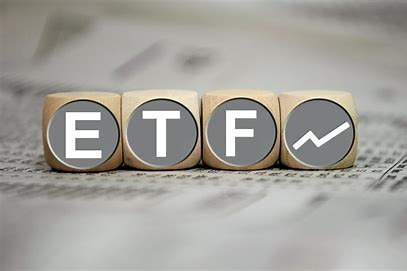

# First code project by Anton Kruse

Welcome to my first own project including python code. This project seeks to give an overview of the largest ETFs provided by the most common ETF suppliers. Personally, I invest small amounts into ETF since the beginning of 2018. Now, I would like to examine, if my choices have been evolved as good as the picked ETF. Furthermore, the scope tries to shed some light into optimal weighting approaches, such that, this notebook tries to perform several optimization methods. Finally, I would like to simulate different portfolio values, if I would have invested monthly a certain amount.

This notebook is only personal motivated and will certainly lack at many point. Diversification will not be covered, since picking the largest ETFs according to their Net Assets does not include any deaper strategy.

In [1]:
# import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas_datareader.data as web
import datetime
import yfinance as yf
from matplotlib import dates
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting
import dash
from dash import html, dcc

### How exactly does the plan for this code look like?

Well, first of all required data must be found. Since I could not find any platform which has the power to show me the best performing ETFs over the last 5 years, while only showing the best ETF per sector, I decided to move on differently. The 5 biggest suppliers are: iShares (IS, Blackrock), Amundi,..
On their websites I got information about their 4 biggest ETFs with respect to the Net Assets. Furtmermore, I included the 4 ETFs I personally invest in since several years. The aim is to examine, if my choice has been good or not.

Step 1: loading the data

Step 2: give an overview about the data and the performance

Step 3: perform portfolio optimization

Step 4: build in the results into interatcive dashboard with dash

### Explaination of the ETFs for deaper understanding & better comparison


hier auflistung der investmentstrategien!!!

In [2]:
# Step 1 - importing data by defining a for loop that gets the tickers from a list
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.today()

ticker_ishares = ['IVV', 'IEFA', 'AGG', 'IJR']
ticker_amundi = ['SPX.MI', 'WLDC.MI', 'USRI.PA', 'MEUD.PA'] 
antons_ticker = ['URTH', 'AEEM.PA', 'IUHE.AS', 'ICOM.L']
data_ishares = pd.DataFrame(columns=ticker_ishares)
data_amundi = pd.DataFrame(columns=ticker_amundi)
antons_data = pd.DataFrame(columns=antons_ticker)

for i in ticker_ishares:
    data_ishares[i] = yf.download(i, start, end)['Adj Close']
for i in ticker_amundi:
    data_amundi[i] = yf.download(i, start, end)['Adj Close']
for i in antons_ticker:
    antons_data[i] = yf.download(i, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Conclusion Step 1: Usually, only on price is used. In real world, that is the adjusted closing time. Therefore it makes sense to us this directly. Technique 1 and 2 are obviously more complicated or need more lines of code, while technique 3 gives everything required in one data frame immediatly. For that reason, we keep moving with the 'data' including the adjusted close price for the four ETFs provided by iShares.

### Plan for Step 2:
1. Descriptive statistic
2. Plot absolute & relative change over time
3. Show key facts for every ETF

In [3]:
# Step 2- descriptive statistic of the data set
data = [data_ishares, data_amundi, antons_data]

for i in data:
    print('This shows the descriptive statistics for {}'.format(i.columns))
    describe = i.describe().transpose()
    display(np.round(describe, 2))

This shows the descriptive statistics for Index(['IVV', 'IEFA', 'AGG', 'IJR'], dtype='object')


,count,mean,std,min,25%,50%,75%,max
IVV,1219.0,332.36,72.32,214.95,266.72,311.79,403.39,474.32
IEFA,1219.0,60.21,7.41,40.19,55.33,57.91,66.66,75.18
AGG,1219.0,105.06,6.76,93.42,98.41,105.93,111.81,114.53
IJR,1219.0,85.22,16.44,47.15,72.92,79.71,102.93,118.39


This shows the descriptive statistics for Index(['SPX.MI', 'WLDC.MI', 'USRI.PA', 'MEUD.PA'], dtype='object')


,count,mean,std,min,25%,50%,75%,max
SPX.MI,1230.0,31.02,6.49,21.28,25.41,29.10,37.94,43.40
WLDC.MI,347.0,10.95,0.43,9.88,10.65,10.86,11.30,11.84
USRI.PA,1053.0,69.14,15.45,44.04,55.81,65.30,84.29,98.10
MEUD.PA,1230.0,166.55,21.42,114.63,150.76,158.96,185.67,212.45


This shows the descriptive statistics for Index(['URTH', 'AEEM.PA', 'IUHE.AS', 'ICOM.L'], dtype='object')


,count,mean,std,min,25%,50%,75%,max
URTH,1219.0,99.35,18.18,64.65,83.33,94.07,115.55,134.88
AEEM.PA,1209.0,4.41,0.48,3.16,4.07,4.27,4.81,5.48
IUHE.AS,601.0,6.22,0.52,5.00,5.80,6.34,6.61,7.20
ICOM.L,1195.0,5.50,1.08,3.72,4.86,5.13,5.96,8.65


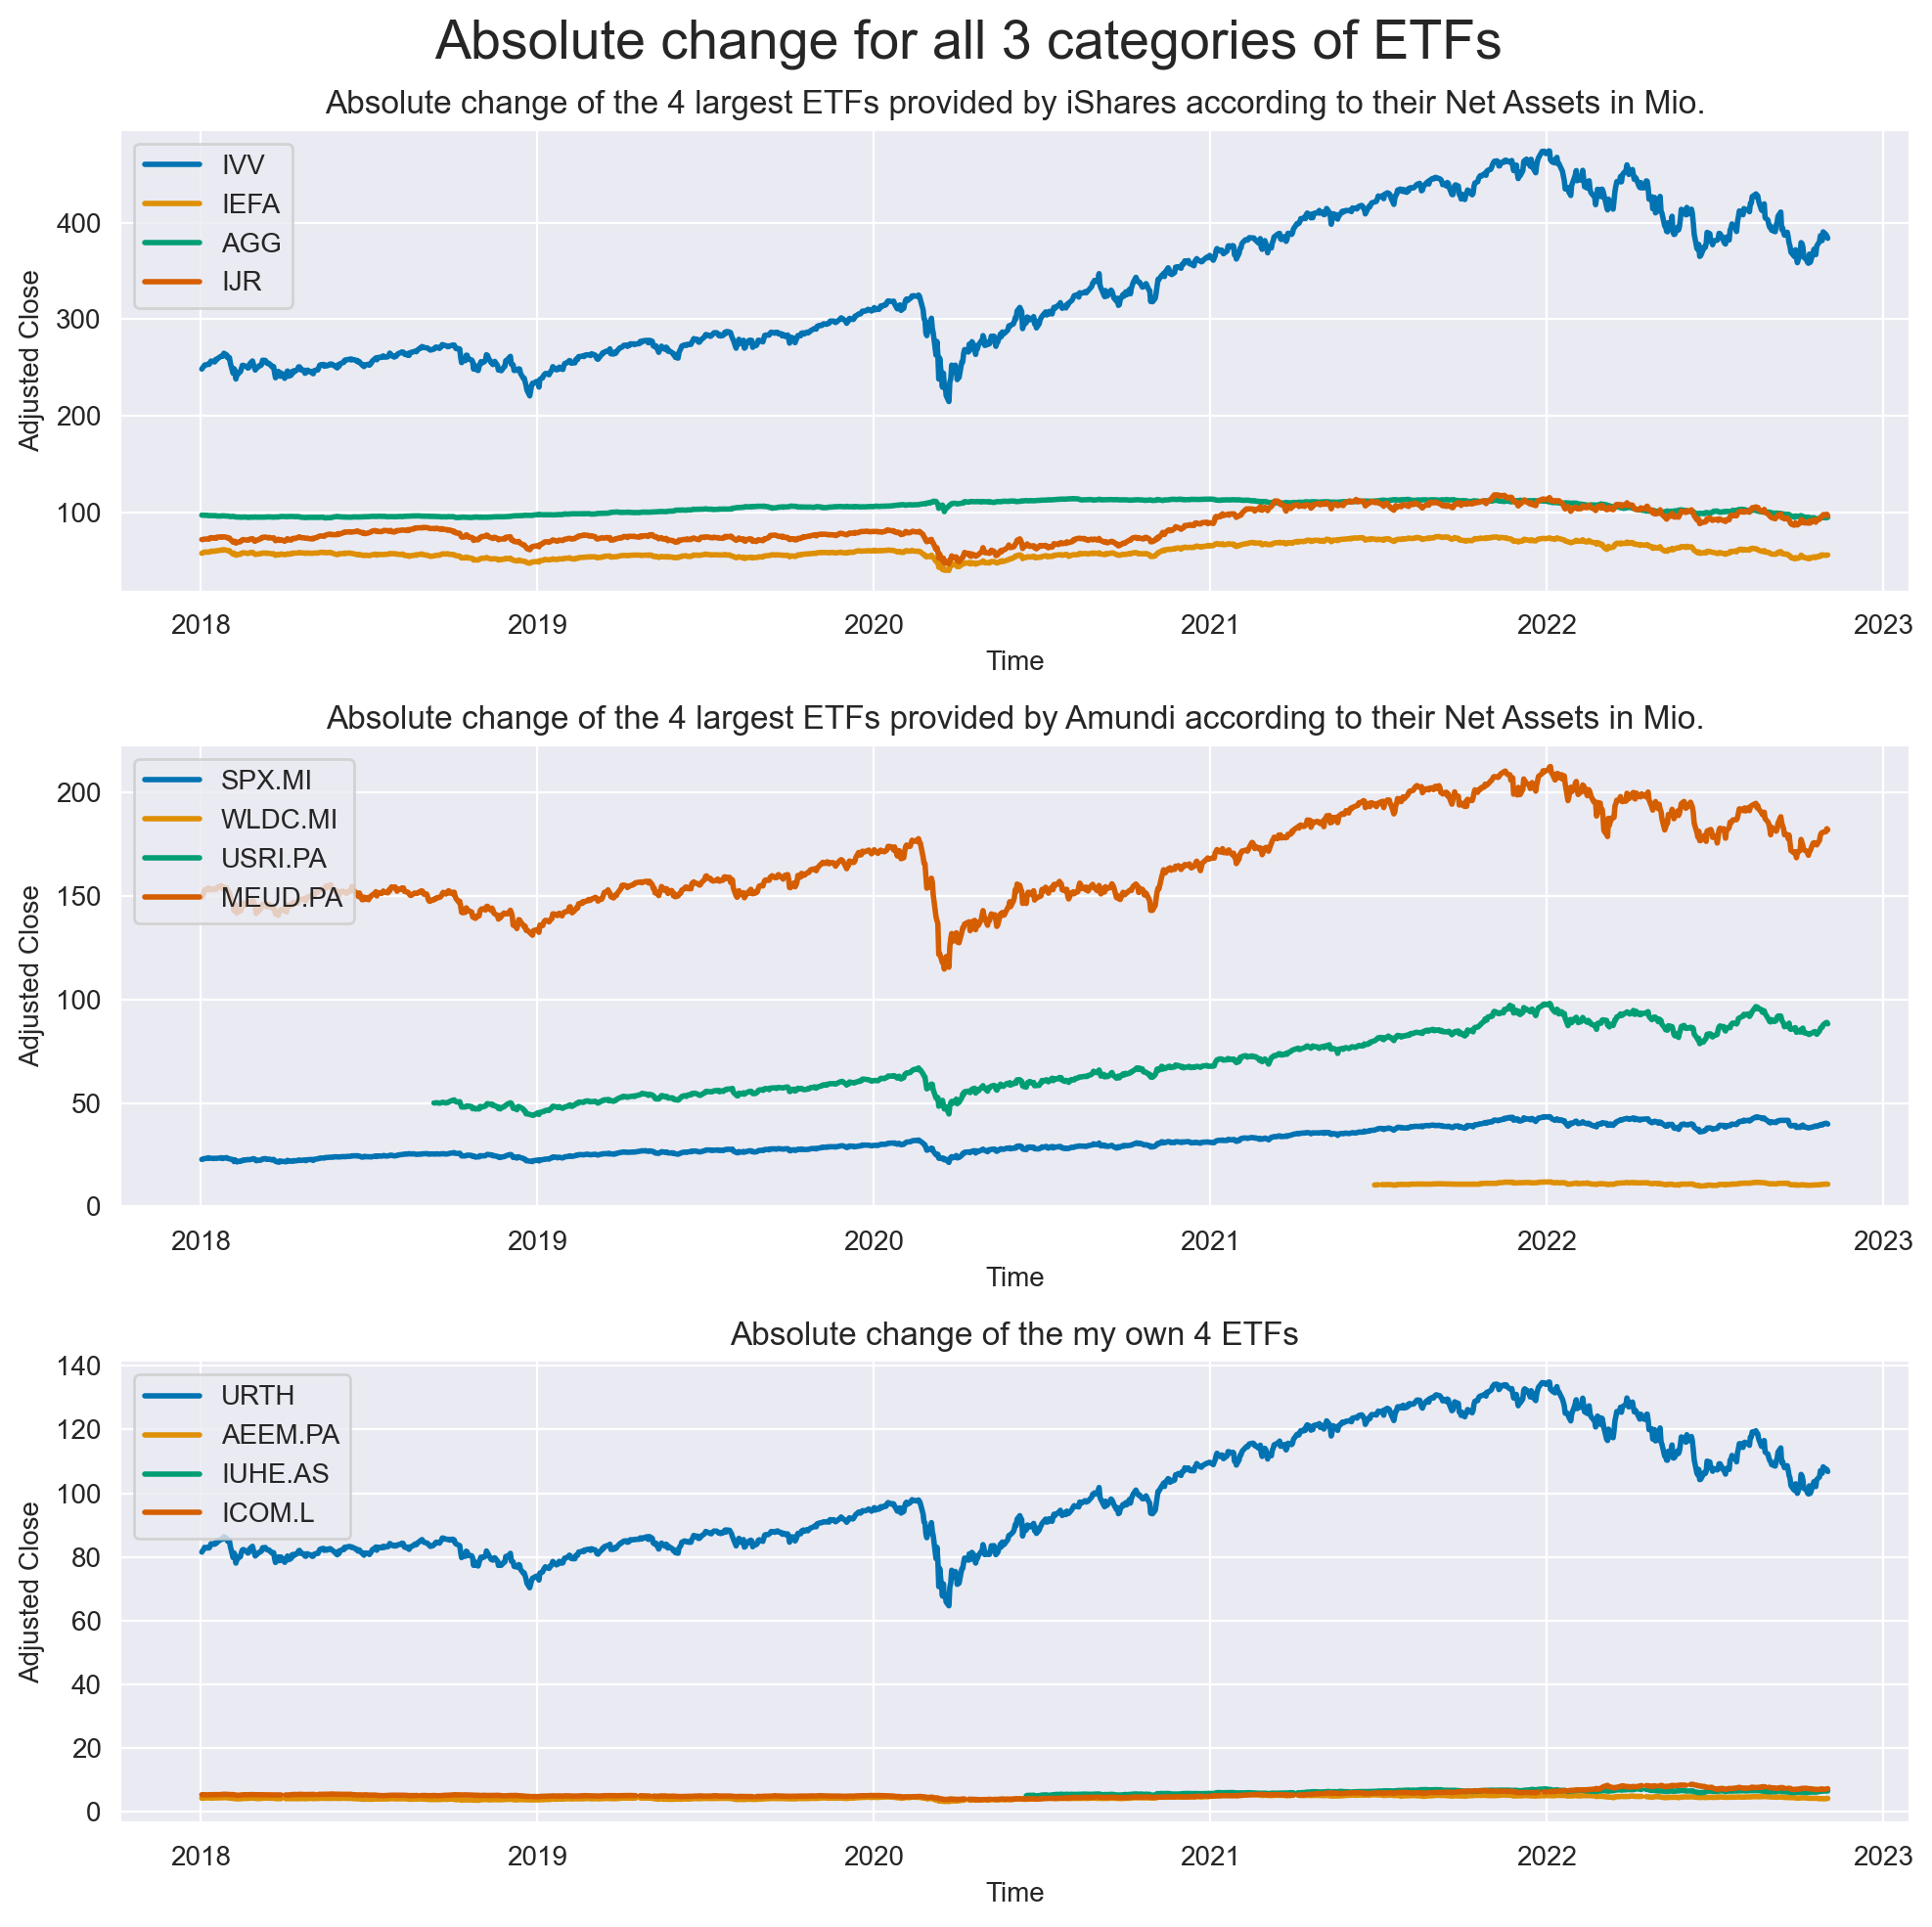

In [4]:
# plotting the absolute change over time for the data
# set style
sns.set_style('darkgrid')
sns.set_palette('colorblind')

fig, ax = plt.subplots(figsize=(10,10), dpi=200, nrows= 3)

ax[0].plot(data_ishares['IVV'], label="IVV", lw=2)
ax[0].plot(data_ishares['IEFA'], label="IEFA", lw=2)
ax[0].plot(data_ishares['AGG'], label="AGG",lw=2)
ax[0].plot(data_ishares['IJR'], label="IJR",lw=2)

ax[1].plot(data_amundi['SPX.MI'], label="SPX.MI", lw=2)
ax[1].plot(data_amundi['WLDC.MI'], label="WLDC.MI", lw=2)
ax[1].plot(data_amundi['USRI.PA'], label="USRI.PA",lw=2)
ax[1].plot(data_amundi['MEUD.PA'], label="MEUD.PA",lw=2)

ax[2].plot(antons_data['URTH'], label="URTH", lw=2)
ax[2].plot(antons_data['AEEM.PA'], label="AEEM.PA", lw=2)
ax[2].plot(antons_data['IUHE.AS'], label="IUHE.AS",lw=2)
ax[2].plot(antons_data['ICOM.L'], label="ICOM.L",lw=2)

ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[2].set_xlabel('Time')
ax[0].set_ylabel('Adjusted Close')
ax[1].set_ylabel('Adjusted Close')
ax[2].set_ylabel('Adjusted Close')


ax[0].set_title('Absolute change of the 4 largest ETFs provided by iShares according to their Net Assets in Mio.')
ax[1].set_title('Absolute change of the 4 largest ETFs provided by Amundi according to their Net Assets in Mio.')
ax[2].set_title('Absolute change of the my own 4 ETFs')

fig.suptitle('Absolute change for all 3 categories of ETFs', fontsize=20)

ax[0].xaxis.set_major_locator(dates.YearLocator())
ax[0].xaxis.set_major_formatter(dates.DateFormatter("%Y"))
ax[0].tick_params(axis="x", which="major",rotation=0, pad=5)

ax[1].xaxis.set_major_locator(dates.YearLocator())
ax[1].xaxis.set_major_formatter(dates.DateFormatter("%Y"))
ax[1].tick_params(axis="x", which="major",rotation=0, pad=5)

ax[2].xaxis.set_major_locator(dates.YearLocator())
ax[2].xaxis.set_major_formatter(dates.DateFormatter("%Y"))
ax[2].tick_params(axis="x", which="major",rotation=0, pad=5)

ax[0].legend(loc ='upper left')
ax[1].legend(loc = 'upper left')
ax[2].legend(loc = 'upper left')

plt.tight_layout()
plt.show();

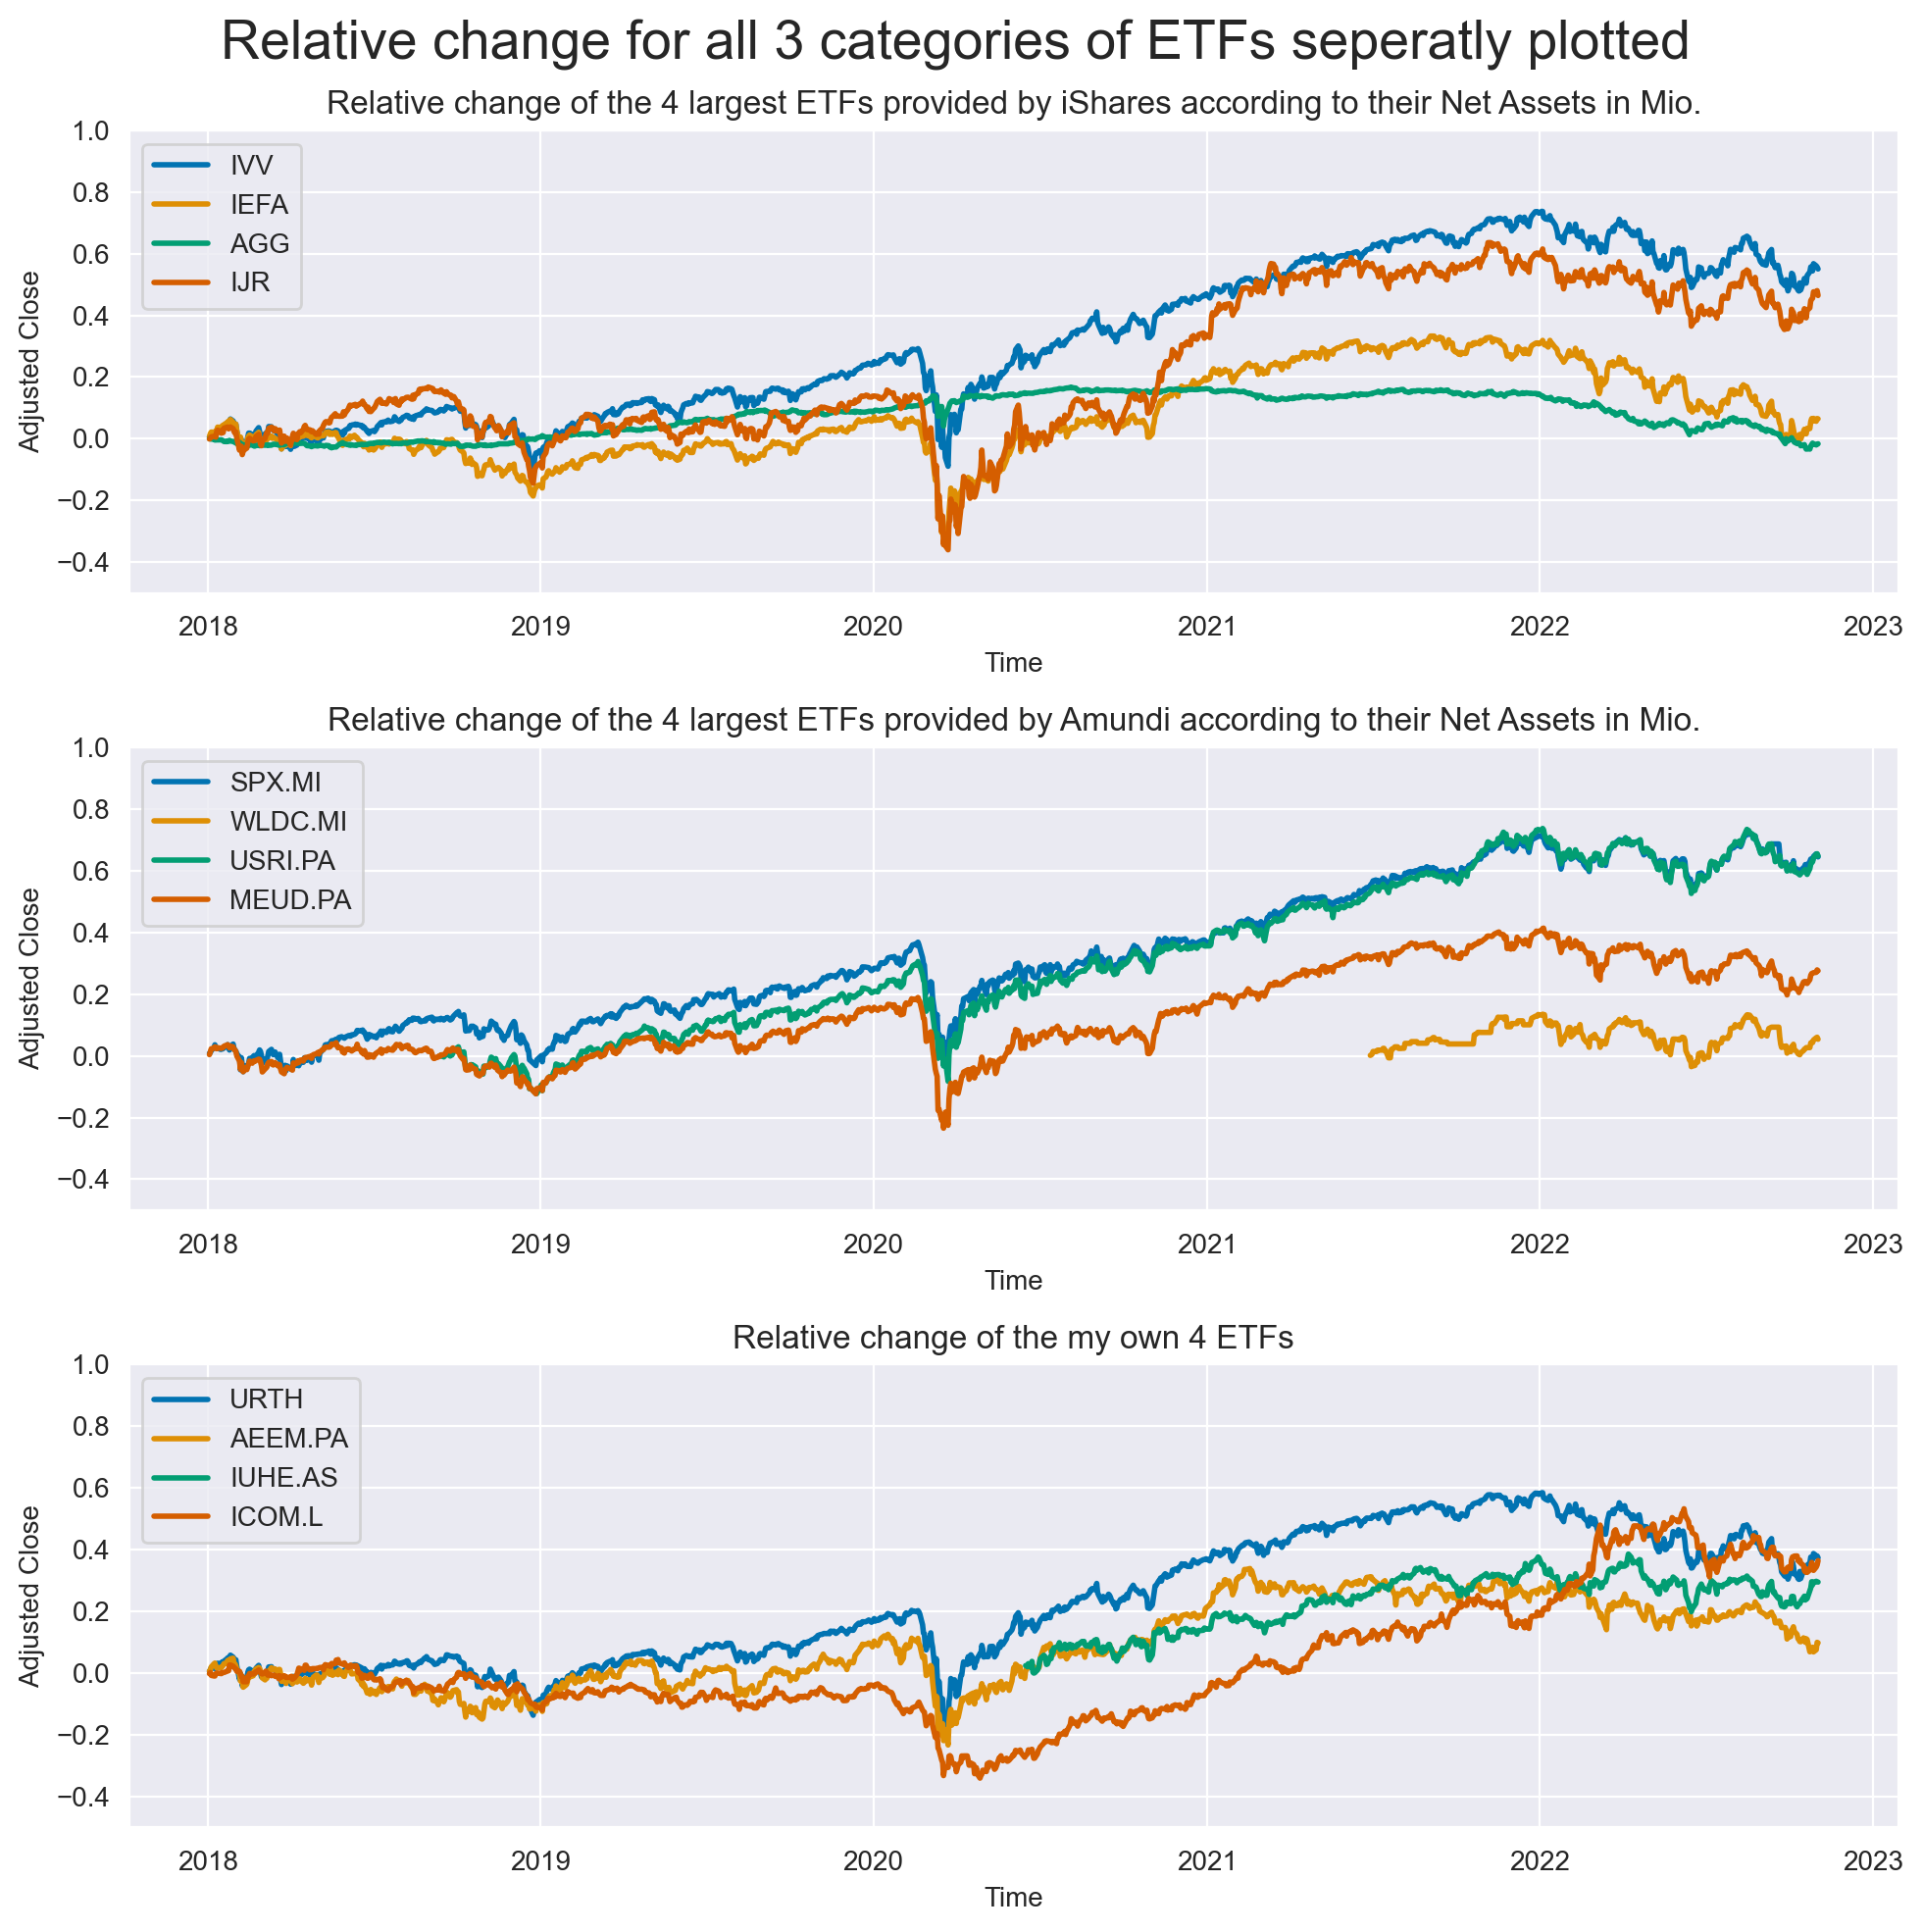

In [5]:
# plotting the relative change over time for the data
# set style
sns.set_style('darkgrid')
sns.set_palette('colorblind')

fig, ax = plt.subplots(figsize=(10,10), dpi=200, nrows= 3)

ax[0].plot(data_ishares['IVV'].pct_change().cumsum(), label="IVV", lw=2)
ax[0].plot(data_ishares['IEFA'].pct_change().cumsum(), label="IEFA", lw=2)
ax[0].plot(data_ishares['AGG'].pct_change().cumsum(), label="AGG",lw=2)
ax[0].plot(data_ishares['IJR'].pct_change().cumsum(), label="IJR",lw=2)

ax[1].plot(data_amundi['SPX.MI'].pct_change().cumsum(), label="SPX.MI", lw=2)
ax[1].plot(data_amundi['WLDC.MI'].pct_change().cumsum(), label="WLDC.MI", lw=2)
ax[1].plot(data_amundi['USRI.PA'].pct_change().cumsum(), label="USRI.PA",lw=2)
ax[1].plot(data_amundi['MEUD.PA'].pct_change().cumsum(), label="MEUD.PA",lw=2)

ax[2].plot(antons_data['URTH'].pct_change().cumsum(), label="URTH", lw=2)
ax[2].plot(antons_data['AEEM.PA'].pct_change().cumsum(), label="AEEM.PA", lw=2)
ax[2].plot(antons_data['IUHE.AS'].pct_change().cumsum(), label="IUHE.AS",lw=2)
ax[2].plot(antons_data['ICOM.L'].pct_change().cumsum(), label="ICOM.L",lw=2)

ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[2].set_xlabel('Time')
ax[0].set_ylabel('Adjusted Close')
ax[1].set_ylabel('Adjusted Close')
ax[2].set_ylabel('Adjusted Close')


ax[0].set_title('Relative change of the 4 largest ETFs provided by iShares according to their Net Assets in Mio.')
ax[1].set_title('Relative change of the 4 largest ETFs provided by Amundi according to their Net Assets in Mio.')
ax[2].set_title('Relative change of the my own 4 ETFs')

fig.suptitle('Relative change for all 3 categories of ETFs seperatly plotted', fontsize=20)

ax[0].xaxis.set_major_locator(dates.YearLocator())
ax[0].xaxis.set_major_formatter(dates.DateFormatter("%Y"))
ax[0].tick_params(axis="x", which="major",rotation=0, pad=5)

ax[1].xaxis.set_major_locator(dates.YearLocator())
ax[1].xaxis.set_major_formatter(dates.DateFormatter("%Y"))
ax[1].tick_params(axis="x", which="major",rotation=0, pad=5)

ax[2].xaxis.set_major_locator(dates.YearLocator())
ax[2].xaxis.set_major_formatter(dates.DateFormatter("%Y"))
ax[2].tick_params(axis="x", which="major",rotation=0, pad=5)

ax[0].set_ylim((-0.5,1))
ax[1].set_ylim((-0.5,1))
ax[2].set_ylim((-0.5,1))

ax[0].legend(loc ='upper left')
ax[1].legend(loc = 'upper left')
ax[2].legend(loc = 'upper left')

plt.tight_layout()
plt.show();

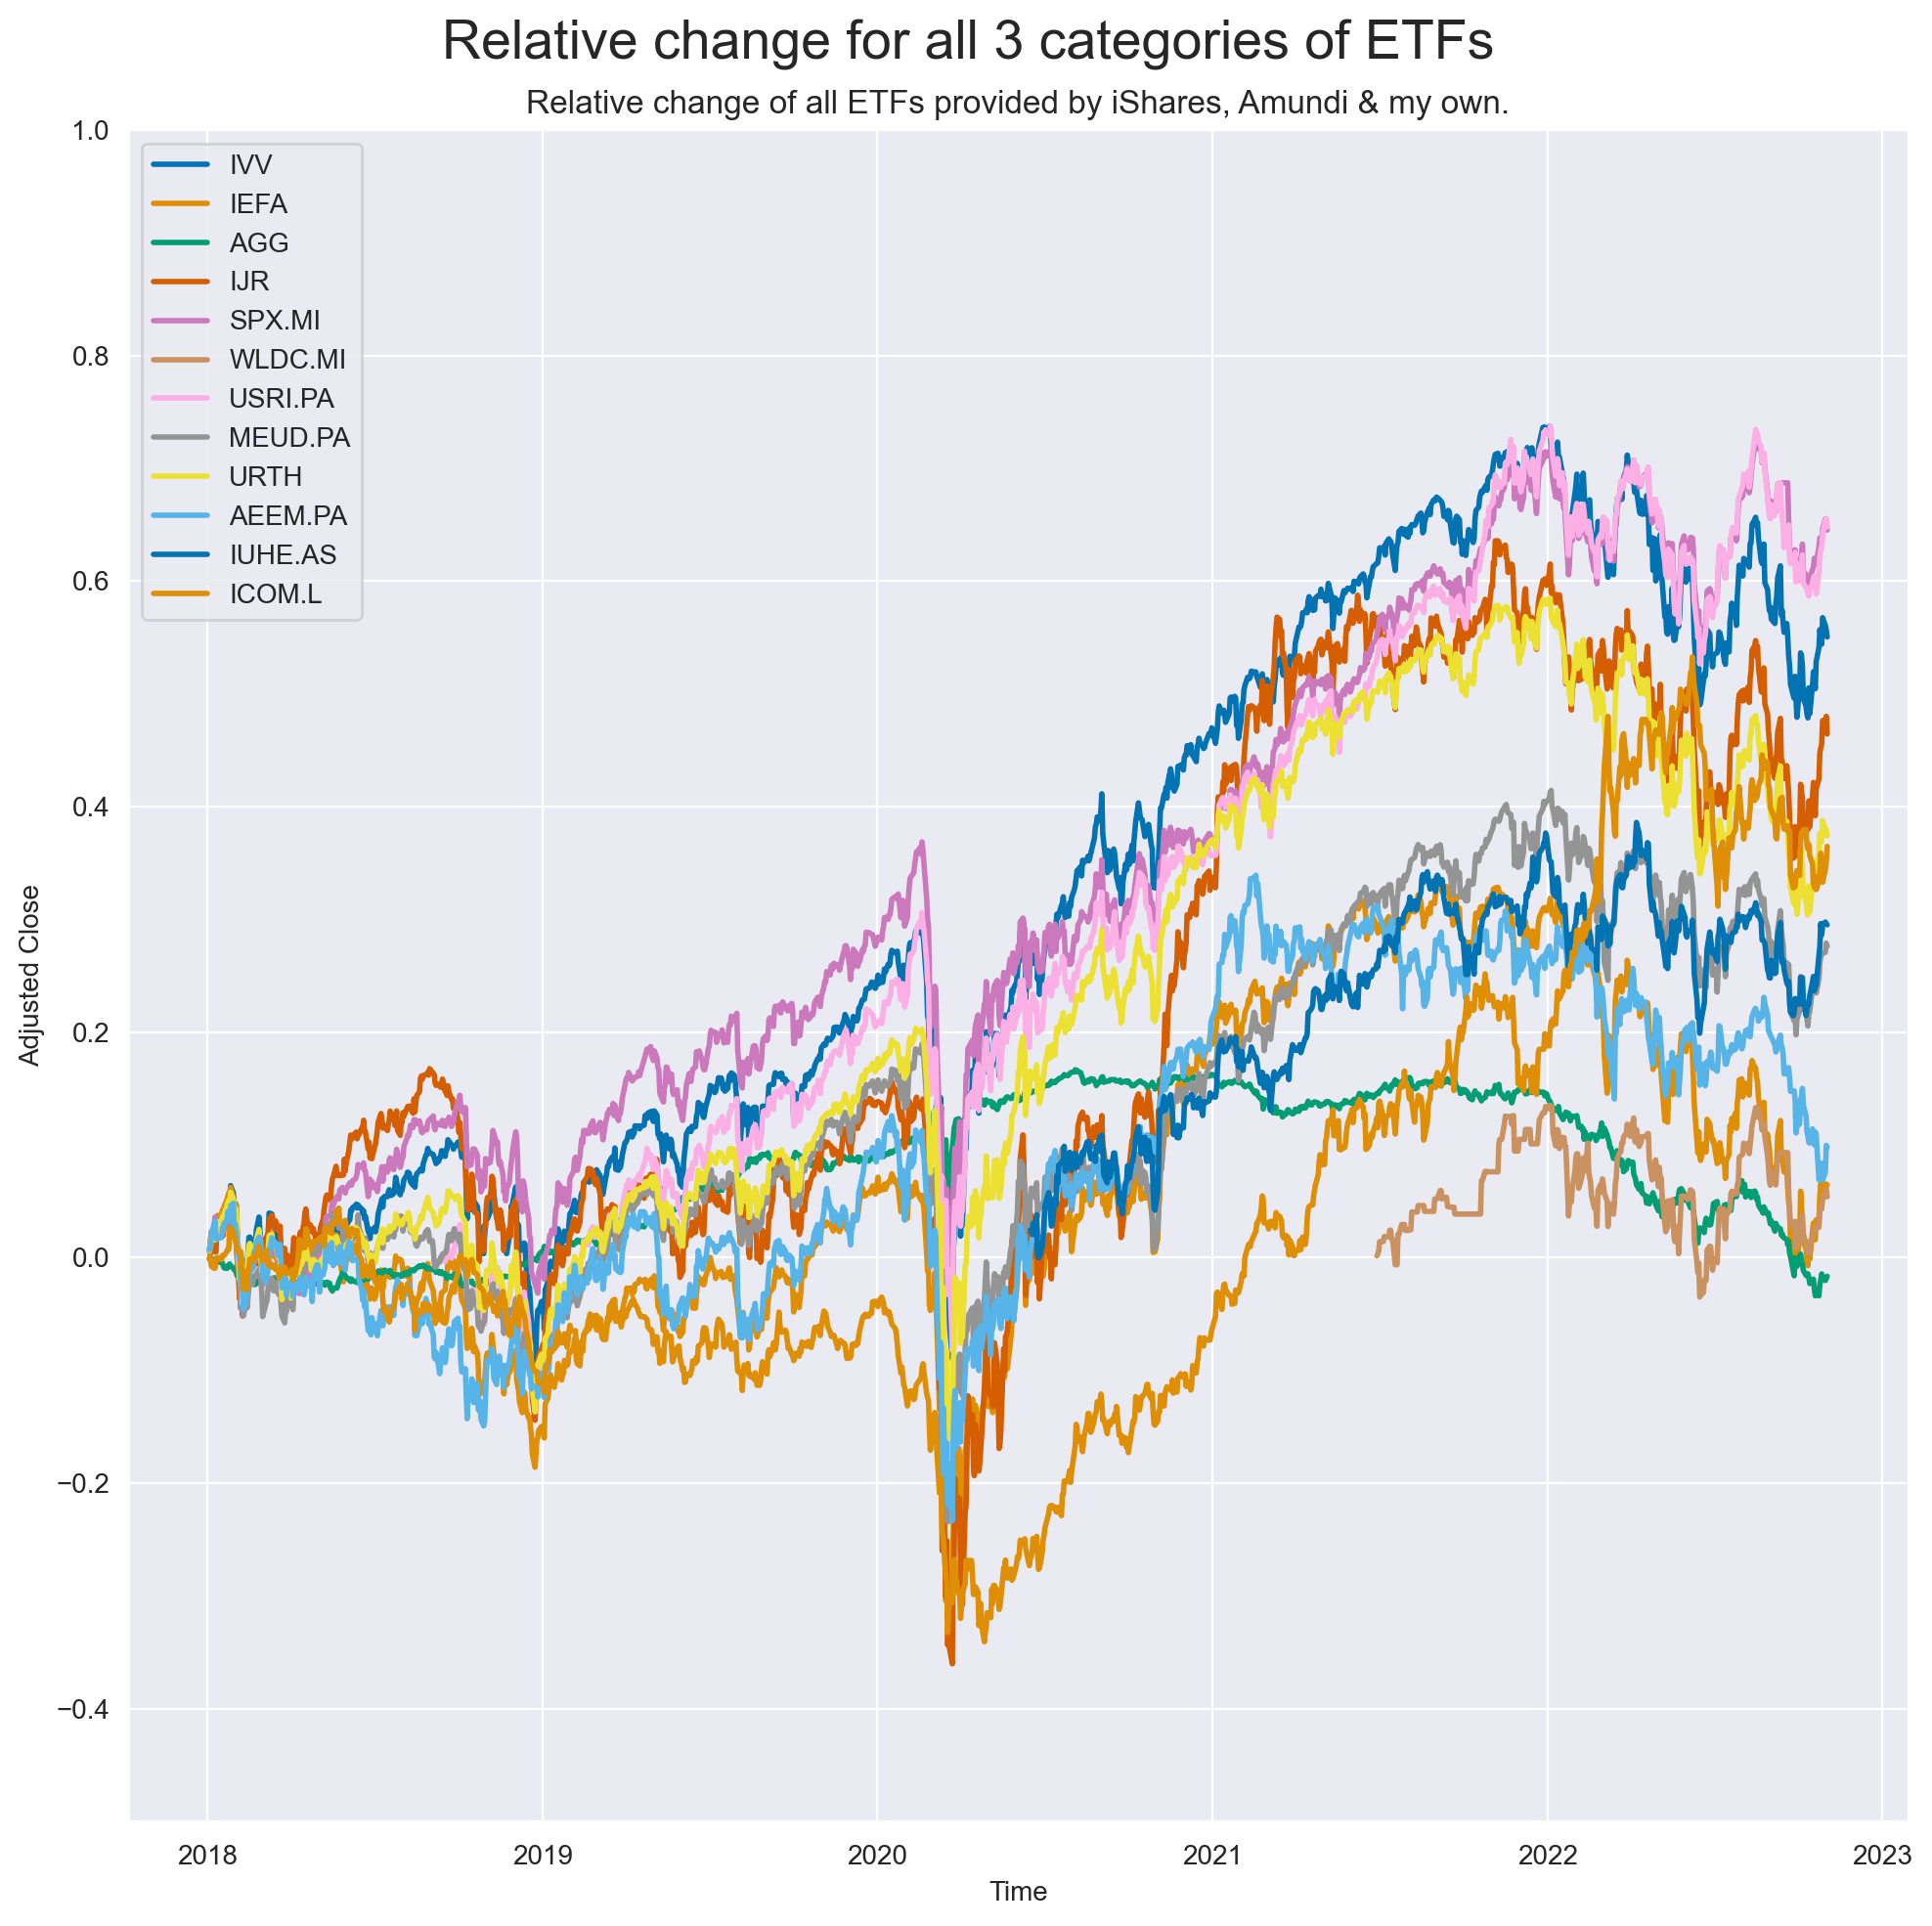

In [6]:
# put everything into one graph
# plotting the relative change over time for the data
# set style
sns.set_style('darkgrid')
sns.set_palette('colorblind')

fig, ax = plt.subplots(figsize=(10,10), dpi=200)

ax.plot(data_ishares['IVV'].pct_change().cumsum(), label="IVV", lw=2)
ax.plot(data_ishares['IEFA'].pct_change().cumsum(), label="IEFA", lw=2)
ax.plot(data_ishares['AGG'].pct_change().cumsum(), label="AGG",lw=2)
ax.plot(data_ishares['IJR'].pct_change().cumsum(), label="IJR",lw=2)

ax.plot(data_amundi['SPX.MI'].pct_change().cumsum(), label="SPX.MI", lw=2)
ax.plot(data_amundi['WLDC.MI'].pct_change().cumsum(), label="WLDC.MI", lw=2)
ax.plot(data_amundi['USRI.PA'].pct_change().cumsum(), label="USRI.PA",lw=2)
ax.plot(data_amundi['MEUD.PA'].pct_change().cumsum(), label="MEUD.PA",lw=2)

ax.plot(antons_data['URTH'].pct_change().cumsum(), label="URTH", lw=2)
ax.plot(antons_data['AEEM.PA'].pct_change().cumsum(), label="AEEM.PA", lw=2)
ax.plot(antons_data['IUHE.AS'].pct_change().cumsum(), label="IUHE.AS",lw=2)
ax.plot(antons_data['ICOM.L'].pct_change().cumsum(), label="ICOM.L",lw=2)

ax.set_xlabel('Time')
ax.set_ylabel('Adjusted Close')

ax.set_title('Relative change of all ETFs provided by iShares, Amundi & my own.')

fig.suptitle('Relative change for all 3 categories of ETFs', fontsize=20)

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))
ax.tick_params(axis="x", which="major",rotation=0, pad=5)

ax.set_ylim((-0.5,1))

plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show();

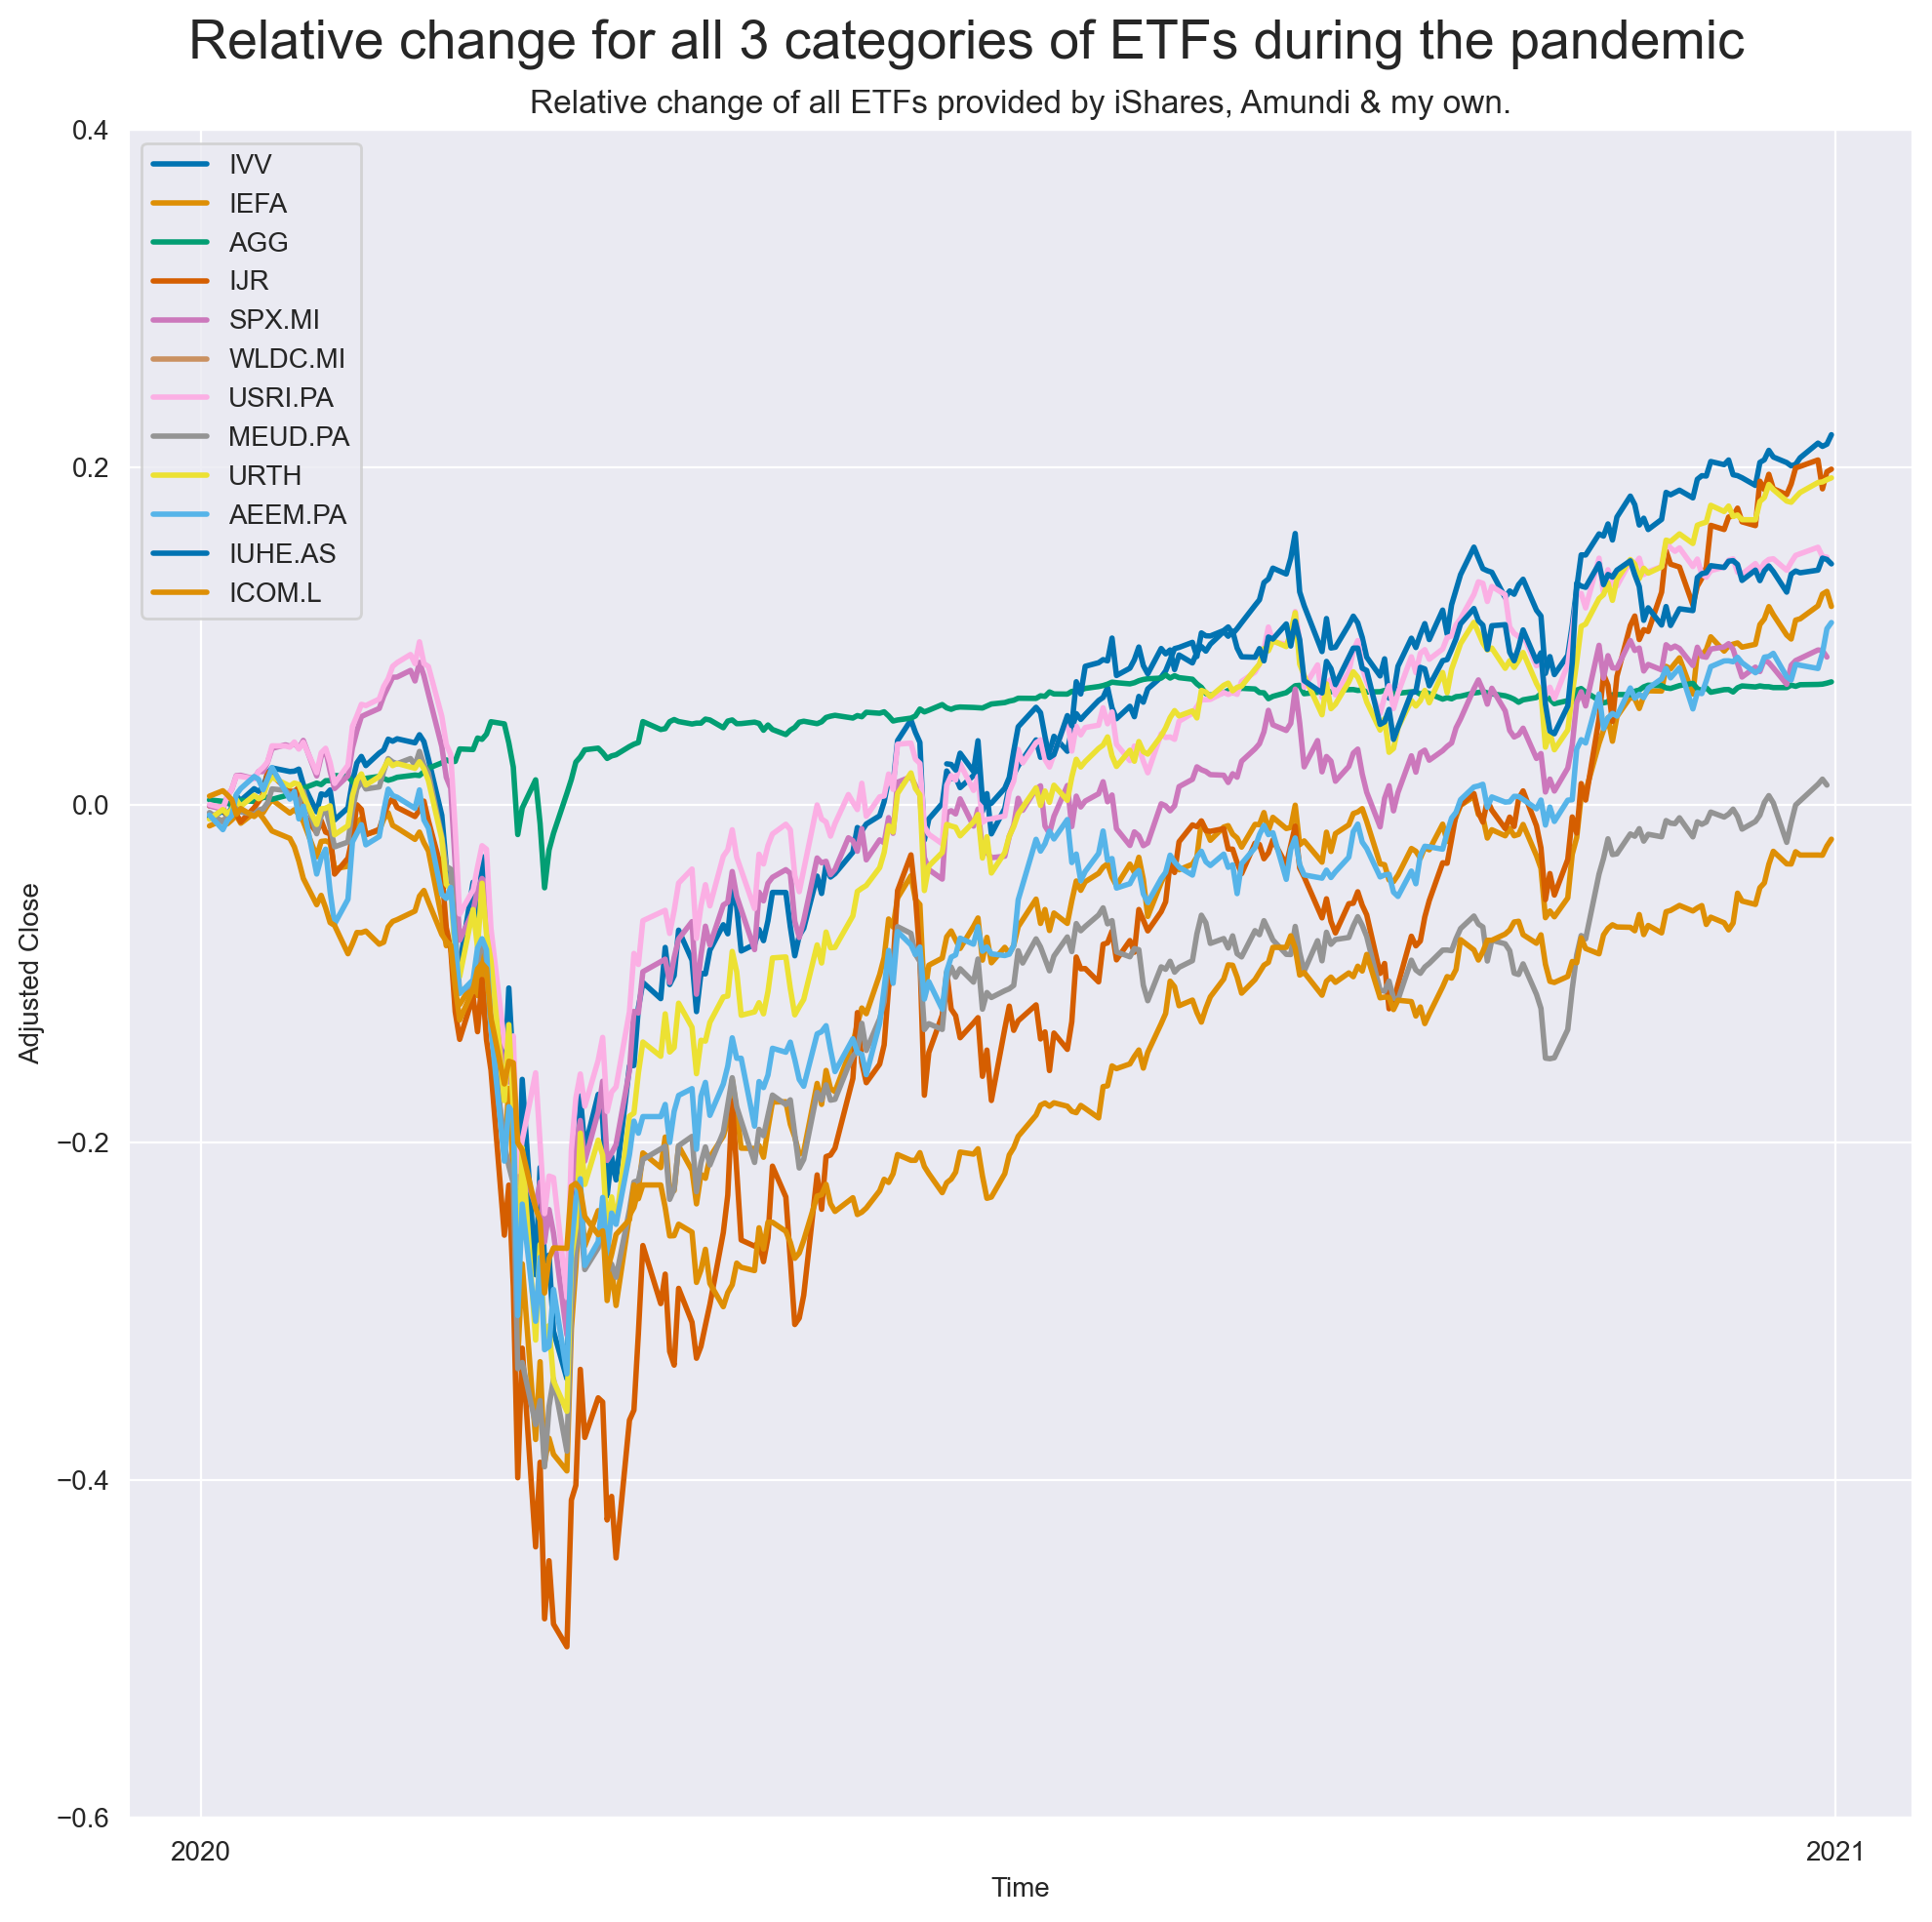

In [7]:
# get a visible idea how these ETFs are correlated by focus on the development during the pandemic
sns.set_style('darkgrid')
sns.set_palette('colorblind')

fig, ax = plt.subplots(figsize=(10,10), dpi=200)

ax.plot(data_ishares['IVV']["2020-01-01":"2021-01-01"].pct_change().cumsum(), label="IVV", lw=2)
ax.plot(data_ishares['IEFA']["2020-01-01":"2021-01-01"].pct_change().cumsum(), label="IEFA", lw=2)
ax.plot(data_ishares['AGG']["2020-01-01":"2021-01-01"].pct_change().cumsum(), label="AGG",lw=2)
ax.plot(data_ishares['IJR']["2020-01-01":"2021-01-01"].pct_change().cumsum(), label="IJR",lw=2)

ax.plot(data_amundi['SPX.MI']["2020-01-01":"2021-01-01"].pct_change().cumsum(), label="SPX.MI", lw=2)
ax.plot(data_amundi['WLDC.MI']["2020-01-01":"2021-01-01"].pct_change().cumsum(), label="WLDC.MI", lw=2)
ax.plot(data_amundi['USRI.PA']["2020-01-01":"2021-01-01"].pct_change().cumsum(), label="USRI.PA",lw=2)
ax.plot(data_amundi['MEUD.PA']["2020-01-01":"2021-01-01"].pct_change().cumsum(), label="MEUD.PA",lw=2)

ax.plot(antons_data['URTH']["2020-01-01":"2021-01-01"].pct_change().cumsum(), label="URTH", lw=2)
ax.plot(antons_data['AEEM.PA']["2020-01-01":"2021-01-01"].pct_change().cumsum(), label="AEEM.PA", lw=2)
ax.plot(antons_data['IUHE.AS']["2020-01-01":"2021-01-01"].pct_change().cumsum(), label="IUHE.AS",lw=2)
ax.plot(antons_data['ICOM.L']["2020-01-01":"2021-01-01"].pct_change().cumsum(), label="ICOM.L",lw=2)

ax.set_xlabel('Time')
ax.set_ylabel('Adjusted Close')

ax.set_title('Relative change of all ETFs provided by iShares, Amundi & my own.')

fig.suptitle('Relative change for all 3 categories of ETFs during the pandemic', fontsize=20)

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))
ax.tick_params(axis="x", which="major",rotation=0, pad=5)

ax.set_ylim((-0.6,0.4))

plt.legend()
plt.tight_layout()
plt.show();

The zoomed graphs shows quite clearly, that the ETFs behave similarly. To get a furter insight into the behavior, we will have a look on their correlation.

In [8]:
# FINISH WHEN AMUNDI IS INCLUDED
all_data1 = data_ishares.merge(data_amundi, on="Date")
all_data = all_data1.merge(antons_data, on='Date')
all_data.head()

,IVV,IEFA,AGG,IJR,SPX.MI,WLDC.MI,USRI.PA,MEUD.PA,URTH,AEEM.PA,IUHE.AS,ICOM.L
Date,,,,,,,,,,,,
2018-01-02,248.559158,57.914581,97.355827,72.191910,22.719999,NaN,NaN,149.320007,81.489571,4.2190,NaN,5.34
2018-01-03,250.000000,58.297379,97.364754,72.126610,22.920000,NaN,NaN,149.940002,81.976051,4.2489,NaN,5.33
2018-01-04,251.082825,58.871567,97.302315,72.322487,22.965000,NaN,NaN,151.339996,82.343208,4.2604,NaN,5.35
2018-01-05,252.670456,59.176056,97.239891,72.630325,23.129999,NaN,NaN,152.820007,82.994896,4.3045,NaN,5.30
2018-01-08,253.230255,59.132565,97.213150,72.742287,23.309999,NaN,NaN,153.089996,82.792961,4.3472,NaN,5.29


In [9]:
# Show the correlation
corr = all_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,IVV,IEFA,AGG,IJR,SPX.MI,WLDC.MI,USRI.PA,MEUD.PA,URTH,AEEM.PA,IUHE.AS,ICOM.L
IVV,1.000000,0.852294,0.557249,0.905260,0.968320,0.734444,0.965179,0.949245,0.991641,0.869182,0.945713,0.670313
IEFA,0.852294,1.000000,0.499909,0.915340,0.728221,0.420444,0.757414,0.889817,0.911995,0.944400,0.639748,0.489306
AGG,0.557249,0.499909,1.000000,0.309070,0.436326,0.317063,0.272666,0.411855,0.568554,0.534393,-0.310088,-0.177060
IJR,0.905260,0.915340,0.309070,1.000000,0.854284,0.615903,0.862565,0.935704,0.930895,0.897447,0.841482,0.713142
SPX.MI,0.968320,0.728221,0.436326,0.854284,1.000000,0.942534,0.997031,0.932831,0.934650,0.770092,0.935983,0.759475
WLDC.MI,0.734444,0.420444,0.317063,0.615903,0.942534,1.000000,0.922674,0.686896,0.607584,0.424414,0.678170,-0.071683
USRI.PA,0.965179,0.757414,0.272666,0.862565,0.997031,0.922674,1.000000,0.923777,0.928493,0.777959,0.932051,0.808973
MEUD.PA,0.949245,0.889817,0.411855,0.935704,0.932831,0.686896,0.923777,1.000000,0.958105,0.874431,0.950160,0.724700
URTH,0.991641,0.911995,0.568554,0.930895,0.934650,0.607584,0.928493,0.958105,1.000000,0.912875,0.879286,0.635904
AEEM.PA,0.869182,0.944400,0.534393,0.897447,0.770092,0.424414,0.777959,0.874431,0.912875,1.000000,0.534577,0.501928


In [10]:
# since thei graph is getting messy by adding more ETFs, a numeric comparison as reasonable
# therefore, the relativ change is shown as a number

ivv_pct = np.round((data_ishares['IVV'].pct_change().cumsum()[-1]) *100, 2)
iefa_pct = np.round((data_ishares['IEFA'].pct_change().cumsum()[-1]) *100, 2)
agg_pct = np.round((data_ishares['AGG'].pct_change().cumsum()[-1]) *100, 2)
ijr_pct = np.round((data_ishares['IJR'].pct_change().cumsum()[-1]) *100, 2)
spx_pct = np.round((data_amundi['SPX.MI'].pct_change().cumsum()[-1]) *100, 2)
wldc_pct = np.round((data_amundi['WLDC.MI'].pct_change().cumsum()[-1]) *100, 2)
usri_pct = np.round((data_amundi['USRI.PA'].pct_change().cumsum()[-1]) *100, 2)
meud_pct = np.round((data_amundi['MEUD.PA'].pct_change().cumsum()[-1]) *100, 2)
world_pct = np.round((antons_data['URTH'].pct_change().cumsum()[-1]) *100, 2)
em_pct = np.round((antons_data['AEEM.PA'].pct_change().cumsum()[-1]) *100, 2)
sp_hc_pct = np.round((antons_data['IUHE.AS'].pct_change().cumsum()[-1]) *100, 2)
com_pct = np.round((antons_data['ICOM.L'].pct_change().cumsum()[-1]) *100, 2)

pct_list = [ivv_pct, iefa_pct, agg_pct, ijr_pct, world_pct, em_pct, sp_hc_pct, com_pct, spx_pct, wldc_pct, usri_pct, meud_pct]
pct_own =[world_pct, em_pct, sp_hc_pct, com_pct]

pct_data = pd.DataFrame(pct_list, index=["ivv", "iefa", "agg", "ijr", "world", "em", "sp_hc", "com_swap", "spx", "wldc", "usri", "meud"], columns=["Relative change since 1-1-2018"])
pct_final = pct_data.sort_values('Relative change since 1-1-2018', ascending=False)
pct_data_own = pd.DataFrame(pct_own, index=["world", "em", "sp_hc", "com_swap"], columns=["Relative change since 1-1-2018"])
pct_final_own = pct_data_own.sort_values('Relative change since 1-1-2018', ascending=False)
cm = sns.light_palette("green", as_cmap=True)
display(pct_final.style.background_gradient(cmap=cm))
cs = sns.light_palette("blue", as_cmap=True)
display(pct_final_own.style.background_gradient(cmap=cs))

,Relative change since 1-1-2018
usri,64.790000
spx,64.520000
ivv,55.030000
ijr,46.430000
world,37.400000
com_swap,36.470000
sp_hc,29.520000
meud,27.600000
em,9.820000
iefa,6.460000


,Relative change since 1-1-2018
world,37.400000
com_swap,36.470000
sp_hc,29.520000
em,9.820000


In [11]:
# Step 2 - show the key fact for every ETF
# to finalize: use pd.concat instead & get rid off the column names
# # can we exclude index & column names?

for i in ticker_ishares:
    print(i)
    key_facts = yf.Ticker(i).institutional_holders
    key_facts = pd.concat([key_facts, yf.Ticker(i).major_holders], axis = 0)
    key_facts = key_facts.set_index([0])
    display(key_facts)

for i in ticker_amundi:
    print(i)
    key_facts = yf.Ticker(i).institutional_holders
    key_facts = pd.concat([key_facts, yf.Ticker(i).major_holders], axis = 1)
    key_facts = key_facts.set_index([0])
    display(key_facts)
    
for i in antons_ticker:
    print(i)
    key_facts = yf.Ticker(i).institutional_holders
    key_facts = pd.concat([key_facts, yf.Ticker(i).major_holders], axis = 0)
    key_facts = key_facts.set_index([0])
    display(key_facts)

IVV


,1
0,
Net Assets,268.45B
NAV,386.19
PE Ratio (TTM),2.75
Yield,1.72%
YTD Daily Total Return,-17.72%
Beta (5Y Monthly),1.00
Expense Ratio (net),0.03%
Inception Date,2000-05-15
Previous Close,386.25


IEFA


,1
0,
Net Assets,75.57B
NAV,56.21
PE Ratio (TTM),NaN
Yield,5.16%
YTD Daily Total Return,-23.94%
Beta (5Y Monthly),1.04
Expense Ratio (net),0.07%
Inception Date,2012-10-18
Previous Close,56.21


AGG


,1
0,
Net Assets,77.93B
NAV,94.78
PE Ratio (TTM),121.23
Yield,2.16%
YTD Daily Total Return,-15.61%
Beta (5Y Monthly),1.00
Expense Ratio (net),0.03%
Inception Date,2003-09-22
Previous Close,94.86


IJR


,1
0,
Net Assets,59.05B
NAV,98.30
PE Ratio (TTM),2.52
Yield,1.91%
YTD Daily Total Return,-13.75%
Beta (5Y Monthly),1.10
Expense Ratio (net),0.06%
Inception Date,2000-05-22
Previous Close,98.31


SPX.MI


,1,1
0,,
"(Net Assets, Previous Close)",NaN,40.12
"(NAV, Open)",39.08,40.07
"(PE Ratio (TTM), Bid)",NaN,39.76 x 0
"(Yield, Ask)",1.47%,39.82 x 0
"(YTD Daily Total Return, Day's Range)",-7.96%,39.78 - 40.07
"(Beta (5Y Monthly), 52 Week Range)",0.97,35.92 - 43.65
"(Expense Ratio (net), Volume)",0.09%,44691
"(Inception Date, Avg. Volume)",2010-03-26,10818


WLDC.MI


,1,1
0,,
"(Net Assets, Previous Close)",NaN,10.82
"(NAV, Open)",10.76,10.79
"(PE Ratio (TTM), Bid)",NaN,10.72 x N/A
"(Yield, Ask)",NaN,10.75 x N/A
"(YTD Daily Total Return, Day's Range)",-9.90%,10.72 - 10.79
"(Beta (5Y Monthly), 52 Week Range)",0.00,9.86 - 11.91
"(Expense Ratio (net), Volume)",0.30%,1388
"(Inception Date, Avg. Volume)",2021-06-02,3893


USRI.PA


,1,1
0,,
"(Net Assets, Previous Close)",NaN,88.87
"(NAV, Open)",88.58,88.82
"(PE Ratio (TTM), Bid)",NaN,0.00 x 0
"(Yield, Ask)",0.00%,0.00 x 0
"(YTD Daily Total Return, Day's Range)",-8.47%,88.03 - 88.82
"(Beta (5Y Monthly), 52 Week Range)",0.97,78.38 - 98.40
"(Expense Ratio (net), Volume)",0.08%,8686
"(Inception Date, Avg. Volume)",2018-09-11,12653


MEUD.PA


,1,1
0,,
"(Net Assets, Previous Close)",34.44M,182.41
"(NAV, Open)",180.43,183.27
"(PE Ratio (TTM), Bid)",NaN,0.00 x 0
"(Yield, Ask)",0.00%,0.00 x 0
"(YTD Daily Total Return, Day's Range)",-13.70%,181.89 - 183.29
"(Beta (5Y Monthly), 52 Week Range)",1.02,166.94 - 213.07
"(Expense Ratio (net), Volume)",0.15%,828
"(Inception Date, Avg. Volume)",2013-04-03,13427


URTH


,1
0,
Net Assets,1.88B
NAV,107.30
PE Ratio (TTM),NaN
Yield,2.04%
YTD Daily Total Return,-19.96%
Beta (5Y Monthly),1.03
Expense Ratio (net),0.24%
Inception Date,2012-01-10
Previous Close,107.44


AEEM.PA


,1
0,
Net Assets,NaN
NAV,4.09
PE Ratio (TTM),NaN
Yield,0.00%
YTD Daily Total Return,-19.64%
Beta (5Y Monthly),1.00
Expense Ratio (net),0.10%
Inception Date,2018-04-18
Previous Close,4.1855


IUHE.AS


,1
0,
Net Assets,NaN
NAV,6.53
PE Ratio (TTM),NaN
Yield,1.36%
YTD Daily Total Return,-7.36%
Beta (5Y Monthly),0.00
Expense Ratio (net),0.15%
Inception Date,2020-06-15
Previous Close,6.51


ICOM.L


,1
0,
Net Assets,1.56B
NAV,7.15
PE Ratio (TTM),NaN
Yield,0.00%
YTD Daily Total Return,13.27%
Beta (5Y Monthly),0.00
Expense Ratio (net),0.19%
Inception Date,2017-07-18
Previous Close,7.13


Conclusion Step 2:


### Plan for Step 3 - Portfolio Optimization:
Two interesting perspectives: how does the optimal weighting for my own assets looks like & how does the optimal weighting for all assets looks like.
1. Equal Weighted Holdings
2. Mean-variance method
3. Monte Carlo simulation

In [12]:
# compute the daily returns for each ETF
# since I could not figure out how to clean the data for some ETFs appropiately, I excluded them until I found a solution
all_data = all_data.drop(['WLDC.MI', 'USRI.PA', 'IUHE.AS', 'ICOM.L'], axis=1)
all_data_returns = all_data.pct_change().dropna()

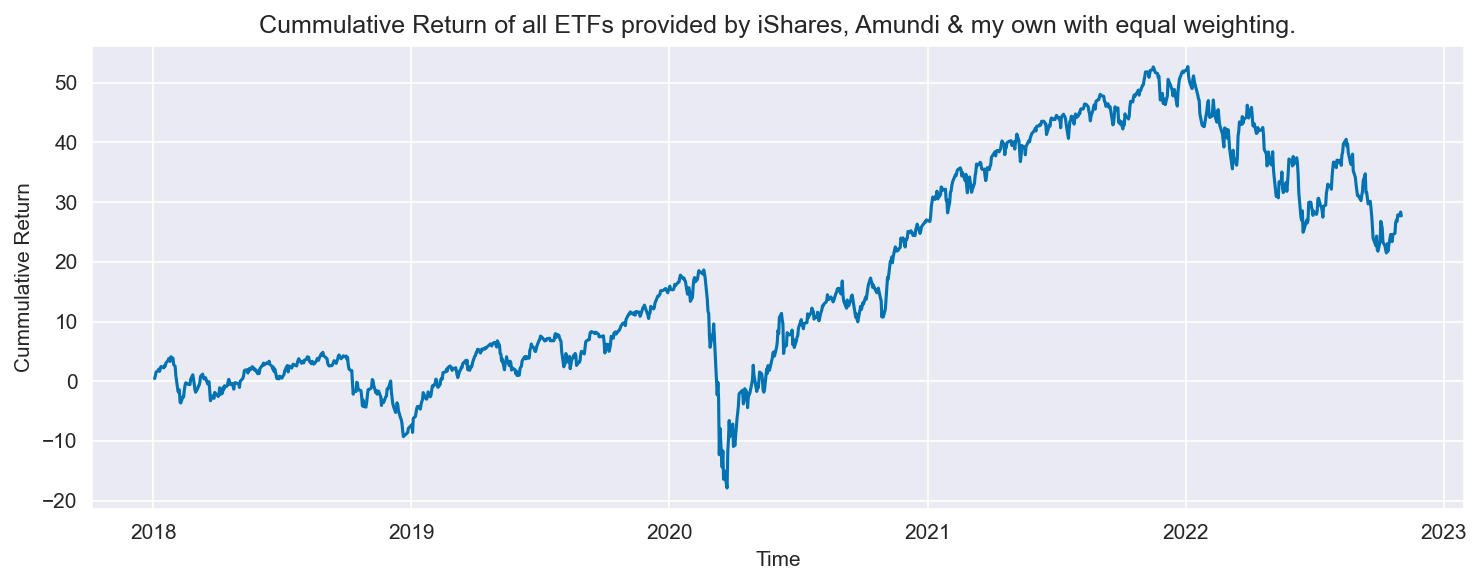

In [13]:
# compute equal weighting
N = len(all_data_returns.columns)
equal_weights = N * [1/N]

# #
# all_data_returns.mul(equal_weights, axis=1).cumsum(axis=1)
# all_data_returns['EWP'] = all_data_returns.dot(weights_equal)

# compute the cummulative returns
equal_returns = np.dot(equal_weights,all_data_returns.transpose())
cum_equal_returns =   (1 + equal_returns).cumprod() - 1
cum_equal_returns_perc = pd.Series(100 * cum_equal_returns)
cum_equal_returns_perc.index = all_data_returns.index

# plot them
sns.set_style('darkgrid')
sns.set_palette('colorblind')

plt.figure(figsize=(10,4), dpi=150)
plt.plot(cum_equal_returns_perc)
plt.xlabel('Time')
plt.ylabel('Cummulative Return')
plt.title('Cummulative Return of all ETFs provided by iShares, Amundi & my own with equal weighting.')

plt.tight_layout()
plt.show();

In [14]:
# mean-variance method
mu = mean_historical_return(all_data)
S = CovarianceShrinkage(all_data).ledoit_wolf()

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

{'IVV': 0.06852, 'IEFA': 0.0, 'AGG': 0.0, 'IJR': 0.0, 'SPX.MI': 0.93148, 'MEUD.PA': 0.0, 'URTH': 0.0, 'AEEM.PA': 0.0}


In [15]:
ef.portfolio_performance(verbose=True)

Expected annual return: 12.3%
Annual volatility: 18.4%
Sharpe Ratio: 0.56


(0.123117699573871, 0.184084168306011, 0.5601660399304629)

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

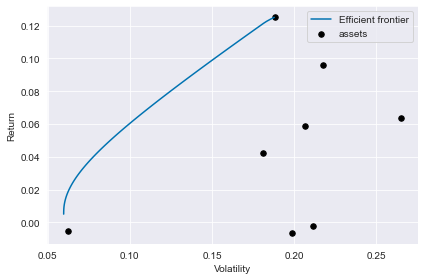

In [16]:
ef_plot = EfficientFrontier(mu, S)
plotting.plot_efficient_frontier(ef_plot)

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

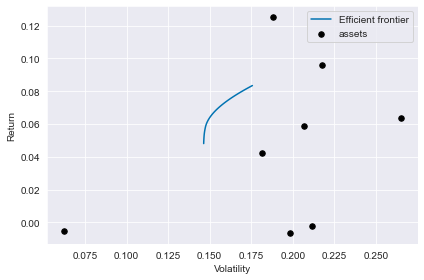

In [17]:
# constraints: the weighting of asset 1 must be greater or equal to 20%, weighting of asset 3 must be equal to 15%
# and the weighting of asset 4 and 5 must be added to be smaller or equal than 10%
ef_plot_c1 = EfficientFrontier(mu, S)
ef_plot_c1.add_constraint(lambda w: w[0] >= 0.2)
ef_plot_c1.add_constraint(lambda w: w[2] == 0.15)
ef_plot_c1.add_constraint(lambda w: w[3] + w[4] <= 0.10)

plotting.plot_efficient_frontier(ef_plot_c1)

Monte Carlo Simulation

In [74]:
# mean_returns = all_data.mean()
# cov_matrix = all_data.cov()

# num_iterations = 10000
# simulation_res = np.zeros((4+len(all_data)-1,num_iterations))

# for i in range(num_iterations):
# #Select random weights and normalize to set the sum to 1
#         weights = np.array(np.random.random(8))
#         weights /= np.sum(weights)
        
#         portfolio_return = np.sum(mean_returns * weights)
#         portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
        
#         simulation_res[0,i] = portfolio_return
#         simulation_res[1,i] = portfolio_std_dev
#         simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]
        
#         for j in range(len(weights)):
#                 simulation_res[j+3,i] = weights[j]
                
# sim_frame = pd.DataFrame(simulation_res.T,columns=['ret','stdev','sharpe',all_data[0],all_data[1],all_data[2],all_data[3],
#                                                   all_data[4], all_data[5], all_data[6], all_data[7]])

# max_sharpe = sim_frame.iloc[sim_frame['sharpe'].idxmax()]
# #Spot the position of the portfolio with minimum Standard Deviation
# min_std = sim_frame.iloc[sim_frame['stdev'].idxmin()]

# #Create a scatter plot coloured by various Sharpe Ratios with standard deviation on the x-axis and returns on the y-axis
# plt.scatter(sim_frame.stdev,sim_frame.ret,c=sim_frame.sharpe,cmap='RdYlBu')
# plt.xlabel('Standard Deviation')
# plt.ylabel('Returns')
# plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='r',s=600)
# #Plot a blue star to highlight position of the portfolio with minimum Variance
# plt.scatter(min_std[1],min_std[0],marker=(5,1,0),color='b',s=600)
# plt.show();

KeyError: 0

In [18]:
cov_matrix = all_data.pct_change().apply(lambda x: np.log(1+x)).cov()
corr_matrix = all_data.pct_change().apply(lambda x: np.log(1+x)).corr()


## Plan for Step 4
Design a interactive dashboard including the findings from step 1 to 3.

In [19]:
antons_app = dash.Dash(__name__)

antons_app.layout = html.Div(
    children=[
        html.H1(children="Antons Analytics",),
        html.P(
            children="Analyze the four biggest ETFs according to their Net Assets provided by iShares & Amundi compared to my own chocies",
        ),
        dcc.Graph(
            figure={
                "data": [
                    {
                        "x": data_ishares.index,
                        "y": data_ishares['IVV'],
                        "type": "lines",
                    },
                ],
                "layout": {"title": "Absolute change of the 4 largest ETFs provided by iShares according to their Net Assets in Mio."},
            },
        ),
        dcc.Graph(
            figure={
                "data": [
                    {
                        "x": data_ishares.index,
                        "y": data_ishares['AGG'],
                        "type": "lines",
                    },
                ],
                "layout": {"title": "Absolute change of the 4 largest ETFs provided by iShares according to their Net Assets in Mio."},
            },
        ),
    ]
)


if __name__ == "__main__":
    antons_app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

C:\Users\anton\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
